<img align="right" width="30%"  src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif">

# Bayesian Inference Part 2: Hierarchical models & Confidence/credible Intervals

## ISM*@ST
Erik Tollerud


As a reminder: Bayesian fundamentals were discussed in [Session 1](Session%201.ipynb). I'll be following notational conventions from there, so if you get confused by anything that might help you out.

In [1]:
# will be helpful later, I promise

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from graphviz import Digraph

# Bayesian Heirarchical Modeling

#### What is that Word Salad I just said?

* A statistical model that has multiple "levels".   

Too circular, try again?

* If you have a likelihood that depends on two parameter sets $\Theta$ and $\Phi$, and the prior of one can be defined as:

 ${\color{blue}{P(\Theta, \Phi|M)}} = P(\Theta | \Phi)P(\Phi)$ 

  (On the RHS I dropped the $|M$ because it's everywhere.) Usually also the likelihood only depends explicitly on the bottom of the "heirarchy" $\Theta$ : $\color{green}{P(D| \Theta)}$, not $P(D| \Theta, \Phi)$.


Yeah, so... That doesn't really help, does it?  Lets try a concrete example.

## CCD-like example

Suppose you have a photon-counter with perfect (or at least perfectly-calibrated) efficiency logged every second that you run for a minute, and you want to know the rate of something producing photons that it's pointing at. This is a Poisson process, which is conveniently a single-parameter statistical distribution. We can describe this with a "graphical model":

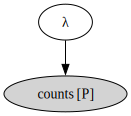

In [2]:
photon_counter = Digraph()
photon_counter.node('counts', 'counts [P]', style="filled")
photon_counter.node('λ', 'λ')
photon_counter.edge('λ', 'counts')
photon_counter

Note that filled nodes usually mean "observed".  This might seem silly right now, but it quickly becomes useful, because in Bayesian modeling you need priors on all of the unobserved variables:

... in Bayesian modeling you need priors on all of the unobserved variables:

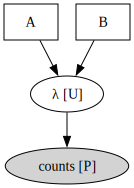

In [3]:
photon_counter2 = Digraph()
photon_counter2.node('counts', 'counts [P]', style="filled")
photon_counter2.node('λ', 'λ [U]')
photon_counter2.edge('λ', 'counts')

photon_counter2.node('A', 'A', shape='box')
photon_counter2.node('B', 'B', shape='box')
photon_counter2.edge('A', 'λ')
photon_counter2.edge('B', 'λ')

photon_counter2

And we can now use that to show the posterior for such a simple case:

array([1, 2, 1, 0, 1, 1, 2, 1, 1, 3, 4, 2, 2, 2, 3, 1, 2, 2, 0, 0, 0, 2,
       0, 1, 1, 1, 0, 2, 4, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 5, 5, 2, 2, 1,
       2, 2, 1, 2, 1, 3, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0])

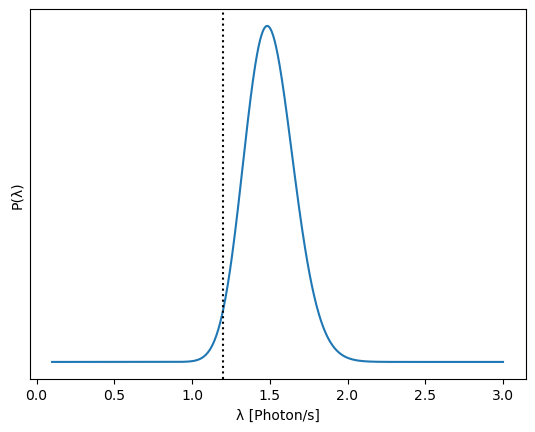

In [4]:
true_count_rate = 1.2 # per second
data = np.random.poisson(true_count_rate, size=60)

A = .1
B = 3

rate = np.linspace(A, B, 1000).reshape(1000,1)
logprobs = np.sum(stats.poisson.logpmf(data, rate), axis=1)

plt.plot(rate, np.exp(logprobs))
plt.axvline(true_count_rate, color='k', ls=':')
plt.xlabel('λ [Photon/s]')
plt.yticks([])
plt.ylabel('P(λ)')
data

What if instead my photon counter is counts from a star and I know I'm observing in g-band, and there are shallower observations in V reported in the literature?  Then I have a guess at the spectral slope/type, and a flux, but the uncertainties aren't in *my* band's flux. I can express my prior then as the best-guess spectrum combined with the V-band flux, and that fully describes my prior, but it's no longer just poisson.

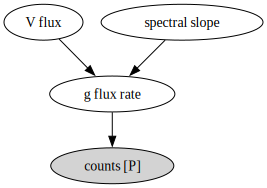

In [5]:
photon_counter_h = Digraph()
photon_counter_h.node('counts', 'counts [P]', style="filled")
photon_counter_h.node('λ', 'g flux rate')
photon_counter_h.node('V', 'V flux')
photon_counter_h.node('s', 'spectral slope')
photon_counter_h.edge('λ', 'counts')
photon_counter_h.edge('V', 'λ')
photon_counter_h.edge('s', 'λ')
photon_counter_h

Now we end up with *3* possible output variables, even though the input data are the same.  But it's actually a *different answer* for λ in the end, in addition to answering the *real* question we wanted (the stellar flux).

(Actually going through this example is an exercise for the reader!)

Note that the  real power of all this becomes clear when you have some part of it be "physical", even if you have to trade off by adding more complex heirarchical levels:

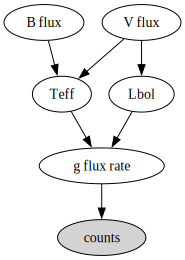

In [6]:
photon_counter_h = Digraph()
photon_counter_h.node('Like', 'counts', style="filled")
photon_counter_h.node('λ', 'g flux rate')
photon_counter_h.node('V', 'V flux')
photon_counter_h.node('B', 'B flux')
photon_counter_h.node('teff', 'Teff')
photon_counter_h.node('l', 'Lbol')
photon_counter_h.edge('λ', 'Like')
photon_counter_h.edge('V', 'teff')
photon_counter_h.edge('B', 'teff')
photon_counter_h.edge('V', 'l')
photon_counter_h.edge('teff', 'λ')
photon_counter_h.edge('l', 'λ')
photon_counter_h

Keep in mind though: this also illustrates that the top-level is subjective, so *everything* is a heirarchical model - you need at least *one* level with some sort of physical interpretation.  Formally it needs two levels to be heirarchical, but that's just silly IMHO.


On the same token, it'simportant to undestand that arbitrarily complex models can show up in diverse scientific settings:

![image](wang_model.png)

Dimensionality reduction for machine learning: https://doi.org/10.1109/TNN.2007.891186

Heirarchical models like this can get very complicated:
![image](fleming_model.png)

Psychology of how people make decisions: https://doi.org/10.1093/nc/nix007

![image](foil_model.jpg)

High altitude human population convergent evolution: https://www.biorxiv.org/content/10.1101/002816v2.article-info

This is really Just meant to illustrate the diversity.  In practice astronomy models tend to be a fair bit simpler because we love us our power laws.  Or more to the point, we tend to have almost exclusively continuous physical models, which make our data more flexible, but bore the statisticians so they go have parties with biologists instead.

## Next Steps

1. Do the exercise outlined above!  I.e., use `emcee` to infer n, V flux, and a spectral slope given a dataset you make up.  Compare what you get for $n$ with the heirarchical model to a simpler uniform model like that I demonstrate above.

2. Try the exercise above, but use it with *real* data. To do this luck up some stars that are in "photometric standard" lists from the BVRI era (e.g. [Landolt standard](https://iopscience.iop.org/article/10.1088/0004-6256/146/5/131)), and then go to the [SDSS navigate page](https://skyserver.sdss.org/dr16/en/tools/chart/navi.aspx) and find one of them that you can cross-identify.

3. If you did this  one in Session 1, build off of https://emcee.readthedocs.io/en/stable/tutorials/line/, interpret it in the context of a heirarchical modeling approach by using snippets like the above to create the relevant graphical model.  If you're feeling imaginative, work out how you might add a layer of heirarchy in addition to the one that's already there and see how it changes the results.

4. Find a simple dataset of your own and try to build a heirarchical model where the top levels are all *physical* parameters.

5. Read some resources:

  * A more in-depth set of "formal stats" lectures: https://astrostatistics.psu.edu/RLectures/hierarchical.pdf
  * A longer set of lecture notes: http://www.stat.cmu.edu/~brian/463-663/week10/Chapter%2009.pdf
  * A full book chapter - chapter 5 of http://www.stat.columbia.edu/~gelman/book/ (includes Python examples here: https://github.com/avehtari/BDA_py_demos/tree/master/demos_ch5)

# Confidence and Credible Intervals

For our second topic we will visit the Bayesian analog of confidence intervals/error bars, known as credible intervals.  This is an area where frequentism and Bayes interpretations differ quite substantially, sometimes with minor but other times with major consequences.


## Confidence Intervals

Frequentist "uncertainity in parameters" relies on the concept of confidence intervals. These are formally to be thought of as an interval that will contain a specific model parameter a certain fraction of the time (where that fraction is the "confidence level" - e.g. 95%). Note that this is *not* what we usually think of as an "uncertainty" - it relies on the frequentist philosophy that you can repeat an experiment many times to validate whetheryour confidence interval guess is correct.  That tends to lead to increasingly convoluted thinking feature double-negatives or a focus on multiple layers of "repeated" observations/experiments where none are actually going to occur in reality.


## Credible Intervals

The Bayesian credible interval is easier to understand mathematically: it is simply the range a parameter falls within at specified probability levels. Alternatively: the "x-axis" for two values of the "y-axis" in a 1D CDF plot. This simplicty relative to the frequentist interpretation comes from the fact that Bayesian inference relies on treating the parameters as probability distributions instead of being fixed values.

(np.float64(1.2482806417597128), np.float64(1.7677546244591877))

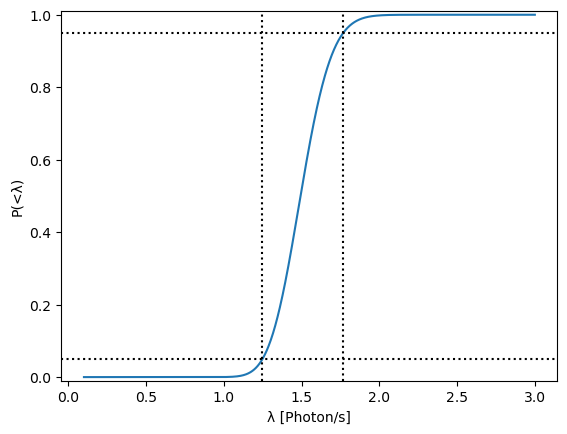

In [7]:
logprobs = np.sum(stats.poisson.logpmf(data, rate), axis=1)
sumprob = np.cumsum(np.exp(logprobs))
sumprob /= sumprob[-1]

plt.plot(rate, sumprob)
lower_rate = np.interp(.05, sumprob, rate.ravel())
upper_rate = np.interp(.95, sumprob, rate.ravel())
plt.axhline(.05, c='k', ls=':')
plt.axhline(.95, c='k', ls=':')
plt.axvline(lower_rate, c='k', ls=':')
plt.axvline(upper_rate, c='k', ls=':')
plt.ylim(-0.01, 1.01)

plt.xlabel('λ [Photon/s]')
plt.ylabel('P(<λ)')

lower_rate, upper_rate

Instead of spending a lot of time illustating this in more detail, I'm going to redirect further discussion here:

http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/

which already says pretty much all of what I wanted to say! I suggest you read through it with a notebook or python interpreter open at the same time and run the examples yourself.

## Bus example

One example not in the above I find illustrative is the "how long do I wait until the next bus arrives" problem.  Particularly apt for Baltimore, IMHO...

Imagine you live near a bus (or train) line you take to get to your work. You live along the line (or can hear it when it stops).  You are eating breakfast when you hear the sound of the bus stopping.  You idly note the time.  Now when you are ready to go, you step outside just in time to see the next bus pull away from the stop. Ugh... how long do you have to wait for the next bus?

For simplicity's sake (and since there are a lot of buses so the central value theorem might hold), lets model bus separations $\Delta t$ as drawn from a gaussian. Our one observation is a single value: $\Delta t_0$

## Frequentist approach

The standard approach with a Gaussian distribution is to compute the sample mean and variance and use those to estimate the result.  The mean is trivial for a single value:

$\bar{\mu} = \Delta t_0$

The variance is where things start going wrong though.  The unbiased sample variance is:

$\sigma^2 = \frac{1}{n-1} \sum_{i=0}^{n} (\Delta t_i - \bar{\mu})^2 = \frac{1}{n-1} (\Delta t_0 -  \Delta t_0) = \infty$

So the variance is inifinite (or perhps 0) - both of which are clearly nonesense.

# Bayesian approach

For the bayesian case, the derivation is trivial - it's just the gaussian distribution centered on $\Delta t_0$, multiplied by whatever prior you want!

This basically means you can get whatever answer you want by setting a prior but it's at least marginally constrained by the one observation you have.

# Exercises 

Once you've had a look at that, it's time to move on to exercises:

1. Examine any of the heirarchical models you did above, and compute credible intervals for some if the parameters.  Think about how you might work this in a frequentist confidence interval context (But if it takes a lot longer than the Credible Interval approach, that might be proving a useful point as well!)
2. Look over a paper of your own or possibly a friend/enemy or just some paper you find interesting that includes a confience interval. Can you tell what the statistical interpretation is meant to be?  Does it actually seem sensible in that context of the above discussion?
3. Look at the [COSfidence example](Session%202%20-%20COSfidence%20and%20Credibility%20Examples.ipynb) inspired by an earier ISM*@ST group meeting discussion